<a href="https://colab.research.google.com/github/yolia/MPCAS_Course/blob/main/NLP_HW1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment 1: Basic Text Processing


In [111]:
import numpy as np
from matplotlib import pyplot as plt
import spacy
from spacy import displacy
from collections import defaultdict, Counter
nlp = spacy.load('en_core_web_sm')

In [112]:
from google.colab import drive
drive.mount('/content/drive')

%cd /content/drive/My Drive/Colab Library/a1_data
#/content/drive/My Drive/Colab Library/training_data.csv
#!unzip 'drive/My Drive/Colab Library/a1_data.zip

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/My Drive/Colab Library/a1_data


In [113]:
# load english mode in spacy
# step 1 in the workflow tokenization: already done by the data provider
# step 2 word frequencies
#lib
#wikipedia.txt
#books.txt
#europarl.txt
lib = ['wikipedia.txt', 'books.txt', 'europarl.txt']
encode = ['utf-8','ISO-8859-1', 'utf-8']

def count_frequency(file_name, encode):
  freqs = Counter() # counter is a instance
  with open(file_name, encoding = encode) as f:
      for line in f:
          tokens = line.lower().split()
          for token in tokens:
              freqs[token] += 1 
  return freqs

In [114]:
freqs = dict()
for id in range(3):
  freqs[id] = count_frequency(lib[id], encode[id])
  print(f'10 most common words in {lib[id]} are listed below')   
  print(freqs[id].most_common()[0:10])


10 most common words in wikipedia.txt are listed below
[('the', 3158463), (',', 2566261), ('.', 1956600), ('of', 1534698), ('and', 1260516), ('in', 1205759), ('a', 958283), ('to', 926287), ('-', 548244), ('is', 522101)]
10 most common words in books.txt are listed below
[('the', 2425678), (',', 2064433), ('.', 1958494), ('and', 1367843), ('of', 1321821), ('to', 1159024), ('a', 1103939), ('is', 792900), ('in', 739009), ('i', 704436)]
10 most common words in europarl.txt are listed below
[('the', 3003965), (',', 2115604), ('.', 1536632), ('of', 1422333), ('to', 1341441), ('and', 1158234), ('in', 945160), ('that', 732156), ('a', 674231), ('is', 671969)]


In [7]:
def red_follower(YOUR_FILE, ENCODING):
  freqs = defaultdict(Counter)
  with open(YOUR_FILE, encoding = ENCODING) as f:
      for line in f:
        tokens = line.lower().split()
        for t1, t2 in zip(tokens, tokens[1:]):
            freqs[t1][t2] += 1
  return freqs

freqs2 =  dict()
for id in range(3):
  freqs2[id] = red_follower(lib[id], encode[id])
  print(f'10 most common words in {lib[id]} that following "red" are')   
  print(freqs2[id]["red"].most_common()[0:10]) # and it runs forever

10 most common words in wikipedia.txt that following "red" are
[(',', 532), ('sox', 495), ('and', 467), ('-', 454), ('army', 404), ('cross', 278), ('.', 213), ('wings', 208), ('sea', 177), ('river', 166)]
10 most common words in books.txt that following "red" are
[('sox', 198), ('herrings', 175), (',', 132), ('army', 126), ('and', 104), ('riding', 83), ('wine', 75), ('october', 69), ('cross', 65), ('"', 65)]
10 most common words in europarl.txt that following "red" are
[('tape', 856), ('cross', 214), ('card', 54), ('lines', 37), ('and', 26), ('army', 26), ('light', 25), ('line', 23), (',', 22), ('.', 18)]


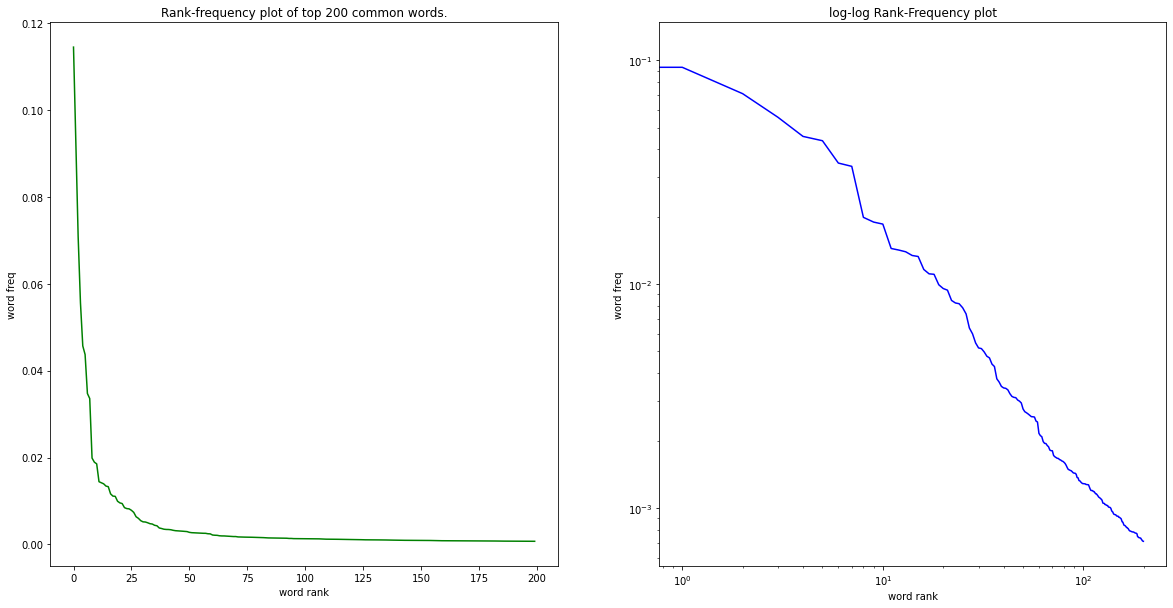

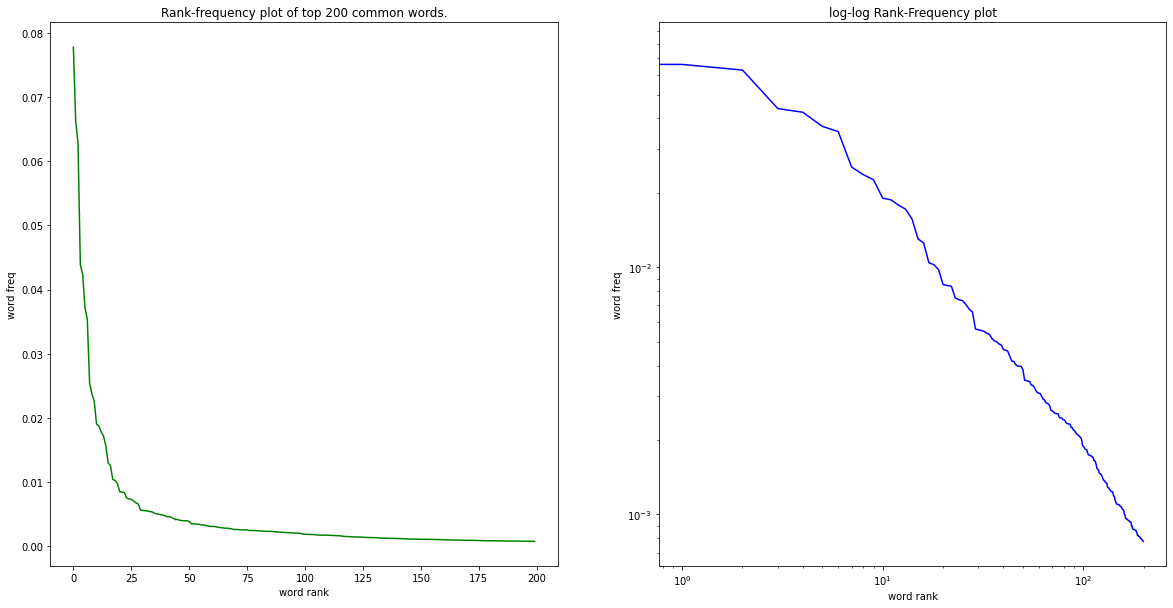

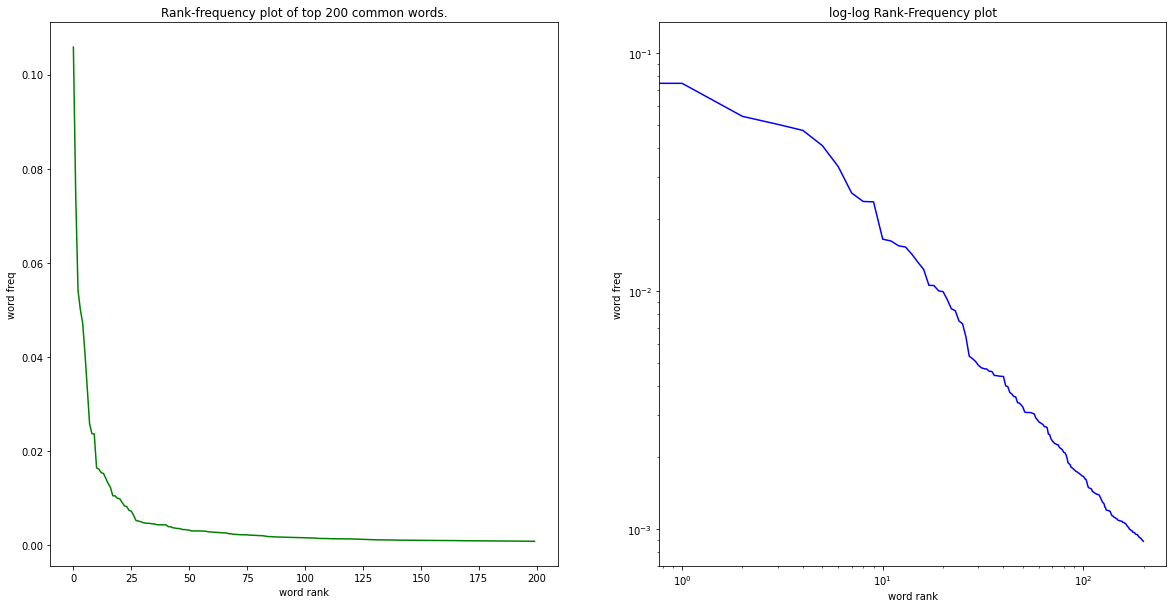

In [128]:
# freq distribution (Zipf's law ?
def plot_zipf(freqs, num_of_words):
    #prep
    fig_size = (20, 10)
    x_label = "word rank"
    y_label = "word freq"
    x = []
    y = []
    temp_list = freqs.most_common(num_of_words)
    for i in range(num_of_words):
        x.append(i)
        y.append(temp_list[i][1])
    sum_y = sum(y)
    y = [i / sum_y for i in y]

    #plt
    f,(plt1, plt2) = plt.subplots(1, 2, figsize= fig_size)
    plt1.plot(x, y, 'g')
    plt1.set_xlabel(x_label)
    plt1.set_ylabel(y_label)
    plt1.set_title("Rank-frequency plot of top " + str(num_of_words) + " common words.")
    #plot2
    plt2.loglog(x, y, 'b')
    plt2.set_xlabel(x_label)
    plt2.set_ylabel(y_label)
    plt2.set_title("log-log Rank-Frequency plot")

for id in range(3):
  plot_zipf(freqs[id], 200)
      

#Comparing Corpora

Language is under the dominance of the power of larger numbers, frequently used words are tend to be predictable in large corpus. In this part of the homework, I will explore a little bit about the difference between tree cropora.

Let's ask, **how can we compair the similarity and difference between them?**

some basic analysis could be:
* list the frequently used words intersection of each corpora. 
* A corpus with clear topic can have some special characteristic, e.g. it can have some frequently mentioned words that appears higher than general. It's natural to think of listing unique words for each corpora.


In [92]:
# find intersection
a = [x for x,y in freqs[0].most_common(100)]
b = [x for x,y in freqs[1].most_common(100)]
c = [x for x,y in freqs[2].most_common(100)]

common = [x for x in a if x in b and x in c]

print("For the top 100 words in each coropora, there are" + ' '+ str(len(common))+ ' ' + 'words that are shared among tree corpora, they are listed below')
common

For the top 200 words in each coropora, there are 53 words that are shared among tree corpora, they are listed below


['the',
 ',',
 '.',
 'of',
 'and',
 'in',
 'a',
 'to',
 'is',
 'was',
 '(',
 ')',
 'for',
 'as',
 'on',
 'with',
 'by',
 'that',
 "'s",
 'from',
 'it',
 'at',
 '?',
 'an',
 'are',
 'which',
 ':',
 'this',
 'be',
 'or',
 'has',
 'also',
 'one',
 'not',
 'their',
 'but',
 'they',
 'have',
 'who',
 'other',
 'been',
 'there',
 'when',
 'all',
 'time',
 'more',
 'can',
 'only',
 'out',
 'up',
 'would',
 'about',
 'these']

In [93]:
unique0 = [x for x in a if x not in b and x not in c]
unique1 = [x for x in b if x not in a and x not in c]
unique2 = [x for x in c if x not in b and x not in a]

In [95]:
print(unique0)
print(unique1)
print(unique2)

["''", 'after', '%', 'two', ';', 'during', 'over', 'years', 'city', 'school', 'used', '`', 'may', 'him', 'known', 'world', 'under', 'where', 'then', 'year', 'later', '|', 'united', 'three', 'state', 'made']
['book', '"', 'read', "n't", '!', 'how', 'me', 'just', 'great', 'story', 'good', 'life', 'books', 'your', 'much', 'reading', 'does', 'even', 'them']
['european', 'mr', '--', 'commission', 'should', 'our', 'must', 'president', 'union', 'parliament', 'member', 'report', 'europe', 'council', 'eu', 'countries', 'us', 'need', 'important', 'policy', 'because', 'rights', 'now', 'support', 'therefore', 'am', 'those', 'take']


## without stop words and punctuation marks
One may easily find out that most of the commonly used words are not meaningful. One of them such as "time" has meaning. These frequently used yet non-meaningful words, they are supporse to make a sentence grammatical completeness and precise. What if we remove words like the, of, and, be, an, and punctuation marks like , !, ?, & etc. Will we find some deeper personality of each of the corpora?


In [51]:
# Just play with code to see if I can dig something
import copy
meaningful_freqs = copy.deepcopy(freqs)
MARKS = ['*', ',', ';', '<', '=', '>', "''",'%','[', '\\', ']', '^', '_', '`', '{', '|', '}', '~', "'", '?', '/','"',"!", ")", "-", "(", "+", '“', '„', '.', ':']
luck_list = list(nlp.Defaults.stop_words)
for id in range(3):
  for stopwords in (luck_list):
    if stopwords in meaningful_freqs[id]:
      del meaningful_freqs[id][stopwords]
  for mark in (MARKS):
    if mark in meaningful_freqs[id]:
      del meaningful_freqs[id][mark]

In [ ]:
meaningful_freqs[0]

In [57]:
[meaningful_freqs[0].most_common(10), meaningful_freqs[1].most_common(10), meaningful_freqs[2].most_common(10)]

[[('new', 82754),
  ('time', 59404),
  ('years', 49722),
  ('city', 47320),
  ('school', 45892),
  ('known', 43598),
  ('world', 42783),
  ('year', 40016),
  ('later', 39576),
  ('united', 37706)],
 [('book', 535757),
  ('read', 172904),
  ('like', 101843),
  ('great', 81683),
  ('story', 81165),
  ('good', 79852),
  ('time', 79672),
  ('life', 76762),
  ('books', 76616),
  ('people', 68615)],
 [('european', 234384),
  ('mr', 150858),
  ('--', 147385),
  ('commission', 134919),
  ('president', 112464),
  ('union', 101779),
  ('states', 96265),
  ('parliament', 95857),
  ('member', 94132),
  ('report', 87496)]]

## plot again to see if zipf's law still stands
Besides little bit distortion, zipf's law still stands for the tree corpora... interesting.

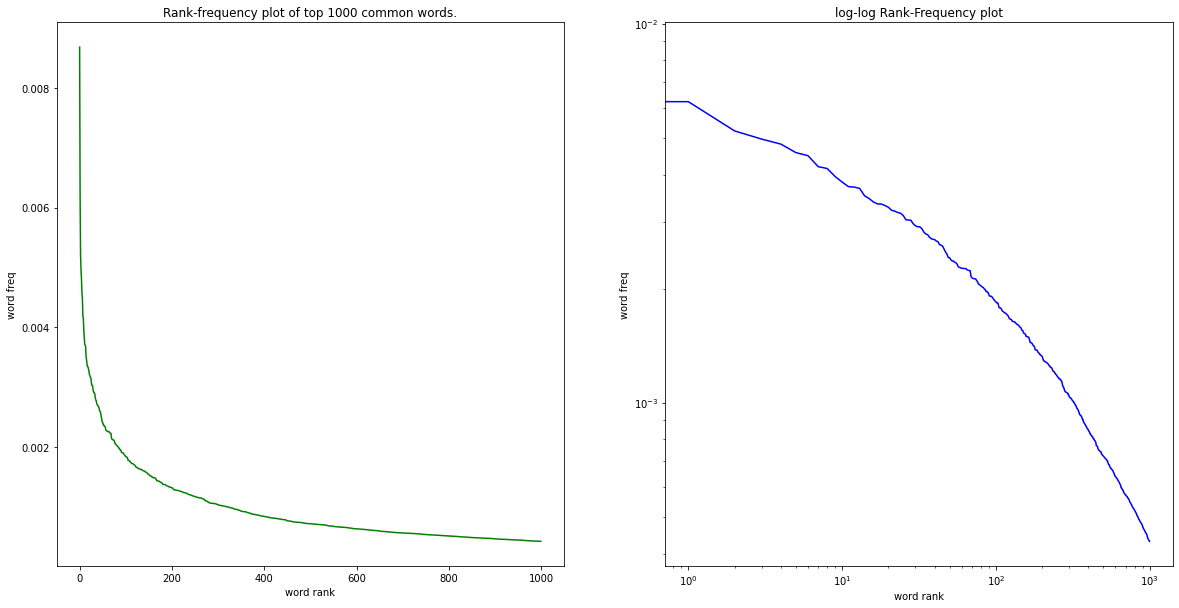

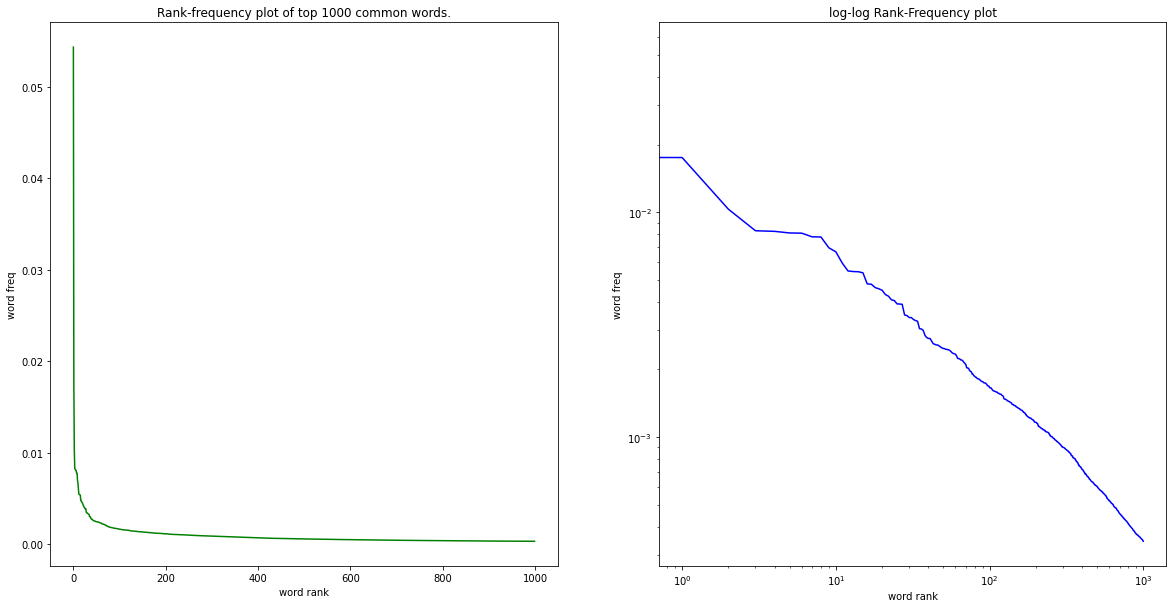

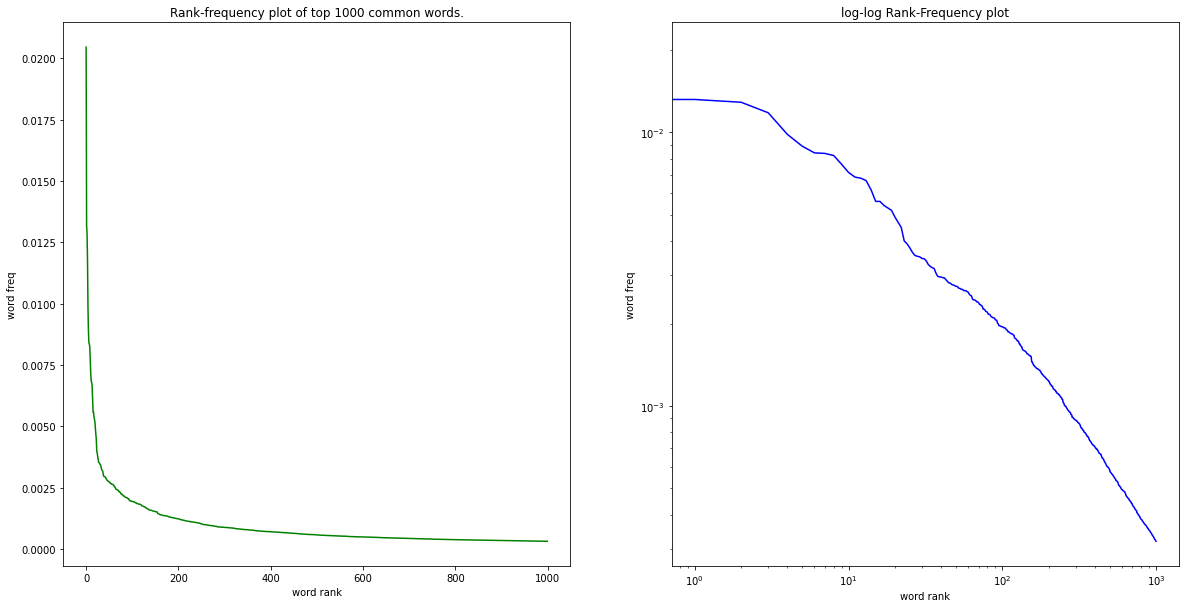

In [129]:
for id in range(3):
  plot_zipf(meaningful_freqs[id], 1000)

## discussion
After we removed commonly used worlds, characteristics arised. You can see from the tables above. The top 10 most frequently used words between tree corpora are completely different, and you can identify which one is which evenif you shuffle the order of them. (I was thinking about a stupide explaination related to zipf's law)

# Preprocessing text for machine learning



# Trying out an NLP toolkit
pipeline:
tokenization
part-of-speech tagging, 
parsing
named entity extraction

In [ ]:
example = 'ASDF Inc. bought two companies last week. One of them was founded by Jane XYZ in 2012 in Germany.'
result = nlp(example)

In [ ]:
displacy.render(result, style='ent', jupyter=True)

In [ ]:
displacy.render(result, style='dep', jupyter=True) #OHHHHH

In [ ]:
temp_list = []
for token in result:
  temp_list.append([token.text, token.pos_, token.lemma_, token.head, token.dep_, ])
print(*temp_list, sep = "\n")


['ASDF', 'PROPN', 'ASDF', Inc., 'compound']
['Inc.', 'PROPN', 'Inc.', bought, 'nsubj']
['bought', 'VERB', 'buy', bought, 'ROOT']
['two', 'NUM', 'two', companies, 'nummod']
['companies', 'NOUN', 'company', bought, 'dobj']
['last', 'ADJ', 'last', week, 'amod']
['week', 'NOUN', 'week', bought, 'npadvmod']
['.', 'PUNCT', '.', bought, 'punct']
['One', 'NUM', 'one', founded, 'nsubjpass']
['of', 'ADP', 'of', One, 'prep']
['them', 'PRON', '-PRON-', of, 'pobj']
['was', 'AUX', 'be', founded, 'auxpass']
['founded', 'VERB', 'found', founded, 'ROOT']
['by', 'ADP', 'by', founded, 'agent']
['Jane', 'PROPN', 'Jane', XYZ, 'compound']
['XYZ', 'PROPN', 'XYZ', by, 'pobj']
['in', 'ADP', 'in', founded, 'prep']
['2012', 'NUM', '2012', in, 'pobj']
['in', 'ADP', 'in', founded, 'prep']
['Germany', 'PROPN', 'Germany', in, 'pobj']
['.', 'PUNCT', '.', founded, 'punct']


In [ ]:
for entity in result.ents:
    print([entity.text, entity.label_])

['ASDF Inc.', 'ORG']
['two', 'CARDINAL']
['last week', 'DATE']
['One', 'CARDINAL']
['Jane XYZ', 'PERSON']
['2012', 'DATE']
['Germany', 'GPE']


# Trying out an NLP toolkit----My result


In [ ]:
example2 = 'Claude Elwood Shannon was an American mathematician, electrical engineer, and cryptographer known as "the father of information theory". Shannon is noted for having founded information theory with a landmark paper, "A Mathematical Theory of Communication", which he published in 1948.'
result2 = nlp(example2)

In [ ]:
displacy.render(result2, style='ent', jupyter=True)

In [ ]:
displacy.render(result2, style='dep', jupyter=True) #OHHHHH

In [ ]:
temp_list2 = []
for token in result2:
  temp_list2.append([token.text, token.pos_, token.lemma_, token.head, token.dep_, ])
print(*temp_list, sep = "\n")

['Claude', 'PROPN', 'Claude', Shannon, 'compound']
['Elwood', 'PROPN', 'Elwood', Shannon, 'compound']
['Shannon', 'PROPN', 'Shannon', was, 'nsubj']
['was', 'AUX', 'be', was, 'ROOT']
['an', 'DET', 'an', mathematician, 'det']
['American', 'ADJ', 'american', mathematician, 'amod']
['mathematician', 'NOUN', 'mathematician', was, 'attr']
[',', 'PUNCT', ',', mathematician, 'punct']
['electrical', 'ADJ', 'electrical', engineer, 'amod']
['engineer', 'NOUN', 'engineer', mathematician, 'conj']
[',', 'PUNCT', ',', engineer, 'punct']
['and', 'CCONJ', 'and', engineer, 'cc']
['cryptographer', 'NOUN', 'cryptographer', engineer, 'conj']
['known', 'VERB', 'know', cryptographer, 'acl']
['as', 'SCONJ', 'as', known, 'prep']
['"', 'PUNCT', '"', as, 'punct']
['the', 'DET', 'the', father, 'det']
['father', 'NOUN', 'father', as, 'pobj']
['of', 'ADP', 'of', father, 'prep']
['information', 'NOUN', 'information', theory, 'compound']
['theory', 'NOUN', 'theory', of, 'pobj']
['"', 'PUNCT', '"', as, 'punct']
['.', 

In [ ]:
for entity in result2.ents:
    print([entity.text, entity.label_])

['Claude Elwood Shannon', 'PERSON']
['American', 'NORP']
['Shannon', 'FAC']
['A Mathematical Theory of Communication"', 'WORK_OF_ART']
['1948', 'DATE']


# Additional questions
Which are the most frequent nouns in the book review corpus?

Which are the most frequently mentioned countries in the Wikipedia corpus?

What are the most frequent items that people drink in the European Parliament corpus?

## Q1 Most frequent nouns in the book review corpus



In [ ]:
temp = str()

In [ ]:
common_voc = freqs[1].most_common()[0:200] #list

clear_voc = [words for words, count in common_voc]
clear_voc = ''.join([str(words) + " " for words in clear_voc]) 

result_book = nlp(clear_voc, disable = ["ner"])  

for token in result_book:
    if token.pos_ == "NOUN":
        print(token)

book
read
story
time
life
books
people
reading
way
work
author
world
love
years
history
characters
reader
man
things
information
use
stories
m
lot
war
series
part
family


## Q2 most frequently mentioned countries in the Wikipedia corpus

## Q3 Most common drinks in EU Parlaiment corpus

In [ ]:
def drink_follower(YOUR_FILE, ENCODING):
  freqs = defaultdict(Counter)
  with open(YOUR_FILE, encoding = ENCODING) as f:
      for line in f:
        tokens = line.lower().split()
        for t1, t2 in zip(tokens, tokens[1:]):
            freqs[t1][t2] += 1
  return freqs

# I should revise this function